In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2016, 12, 1)
btc = web.DataReader("BTCUSD=X", 'yahoo',start)
btc.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-11,5319.148926,5405.405273,5319.148926,5405.405273,5405.405273,0.0
2017-10-12,5586.592285,5617.977539,5586.592285,5617.977539,5617.977539,0.0
2017-10-15,5586.592285,5780.347168,5586.592285,5747.126465,5747.126465,0.0
2017-10-16,5586.592285,5617.977539,5555.555664,5586.592285,5586.592285,0.0
2017-10-17,5586.592285,5617.977539,5263.157715,5291.005371,5291.005371,0.0


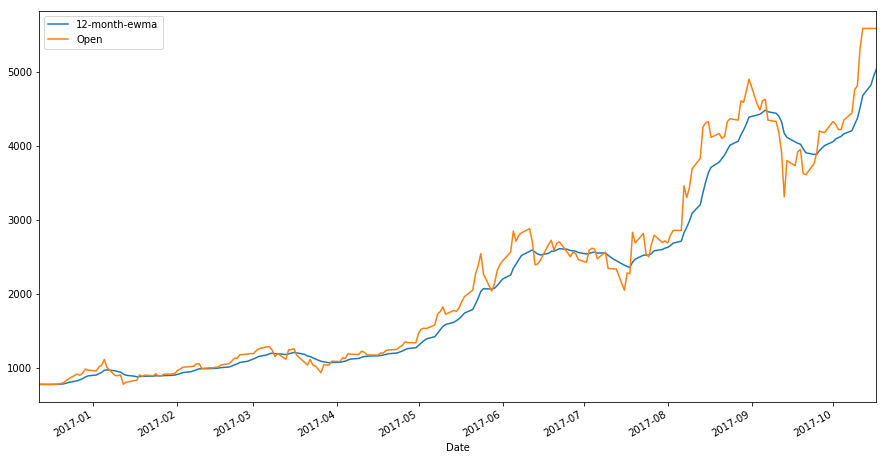

In [3]:
df = pd.DataFrame({'Open': btc['Open'], '12-month-ewma':btc['Open'].ewm(span=12).mean()})
df.dropna(inplace=True)
df.plot(figsize=(15,8))

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
12-month-ewma,223.0,2115.793339,1242.015442,776.545643,1072.985947,1638.508654,2623.641013,5038.069934
Open,223.0,2220.325819,1331.104395,775.350098,1056.524353,1814.881958,2840.932007,5586.592285


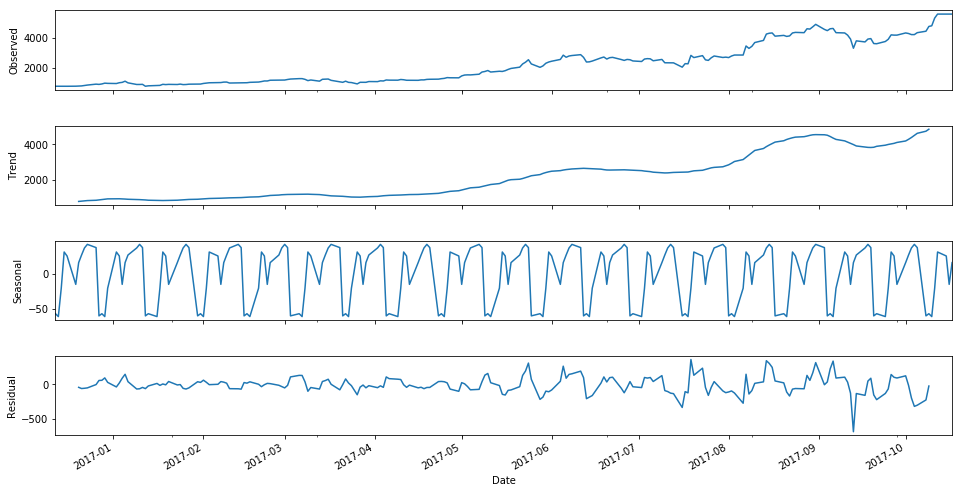

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
trends = seasonal_decompose(df['Open'], freq=12)  
fig = plt.figure()  
fig = trends.plot()  
fig.set_size_inches(15, 8)

In [6]:
from statsmodels.tsa.arima_model import ARIMA

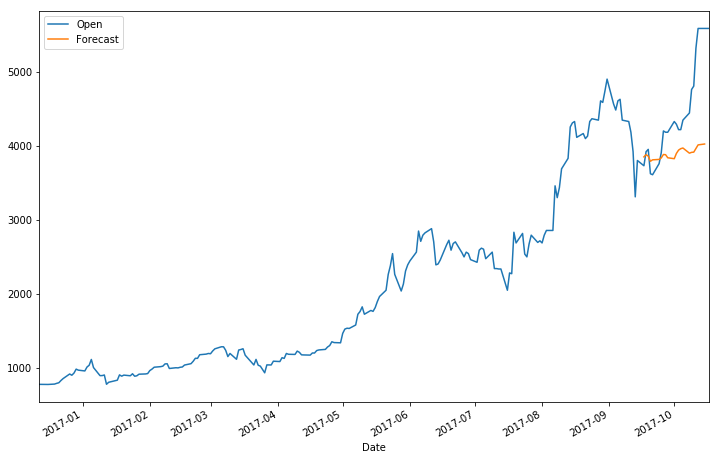

In [7]:
model = sm.tsa.statespace.SARIMAX(df['Open'],order=(0,1,0), seasonal_order=(1,1,3,12))
results = model.fit()
df['Forecast'] = results.predict(start=200, end=220, dynamic=True)
df[['Open','Forecast']].plot(figsize=(12,8))